In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,6)})
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
df = pd.read_csv('nyc_energy_consumption.csv',index_col='timeStamp',parse_dates=True)
df.head()

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89
2012-01-01 02:00:00,4542.6,0.0,45.04
2012-01-01 03:00:00,4357.7,0.0,45.03
2012-01-01 04:00:00,4275.5,0.0,42.61


In [4]:
df.isnull().sum()

demand     81
precip    230
temp      186
dtype: int64

In [5]:
df['demand'] = df['demand'].fillna(method='ffill')
df['temp'] = df['temp'].fillna(method='ffill')

In [6]:
df.isnull().sum()

demand      0
precip    230
temp        0
dtype: int64

In [ ]:
## here we can see some seasonality.
## here we have hourly data so we convert it to Monthely level

In [7]:
df = df.resample('M').mean()

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

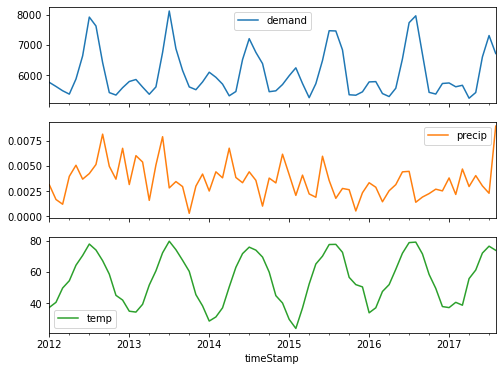

In [8]:
df.plot(subplots=True)

## Not needed but doing for P,D,Q value

In [ ]:
## taking acf and pacf plot for getting p,d,q value 
## there is no need fo stationary data but lets check tationarity
from statsmodels.tsa.stattools import kpss , adfuller

## Adfuller test
# H0 - data is not stationary
# H1 - if p-value < 0.05 data is stationary
adf_test = adfuller(df['demand'])
print('ADF TEST :')
if adf_test[1] < 0.05 :
    print(f'{adf_test[1]} :Fail to reject the H0 , Data is Stationary')
else:
    print(f'{adf_test[1]} :Accept the H0 , Data is not Stationary')
    

## kpss test
# H0 - data is not stationary
# H1 - if p-value > 0.05 data is stationary
kpss_test = kpss(df['demand'])
print('KPSS TEST :')
if kpss_test[1] < 0.05 :
    print(f'{kpss_test[1]} :Accept the H0 , Data is not Stationary')
else:
    print(f'{kpss_test[1]} :Fail to reject the H0 , Data is Stationary')

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

act_lag = acf(df['demand'] , nlags=10)

#plt ACF
plt.figure(figsize=(16,7))
plt.plot(act_lag,marker="*")

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y= -1.96/np.sqrt(len(df['demand'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['demand'])),linestyle='--',color='gray')

plt.title('Auto Correlation')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.tight_layout()

In [ ]:
## Auto Correlation = MA = 1 , 2

In [ ]:

pacf_lag = pacf(df['demand'] , nlags=10)

#plt ACF
plt.figure(figsize=(16,7))
plt.plot(pacf_lag,marker="*")

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y= -1.96/np.sqrt(len(df['demand'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['demand'])),linestyle='--',color='gray')

plt.title('Partial Auto Correlation')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.tight_layout()

In [ ]:
## PArtial Auto Correlation : AR = 1,2

In [ ]:
## lets check by auto Arima
from pmdarima import auto_arima

In [ ]:
arima_model = auto_arima(df['demand'],
                   m = 12 , seasonal= True,
                   start_P=0, start_q=0 , max_order=4 , test='adf',
                   error_action='ignore',suppress_warnings=True,
                   stepwise=True, trace=True )

## Close Now Main Program Continue...

In [12]:
df_new = df.copy()
df_new = df_new.reset_index()
df_new.head()

,timeStamp,demand,precip,temp
0,2012-01-31,5757.495833,0.003116,37.174288
1,2012-02-29,5622.331609,0.001650,40.448046
2,2012-03-31,5479.919198,0.001179,49.607917
3,2012-04-30,5368.945833,0.003959,54.255903
4,2012-05-31,5867.896102,0.005064,64.188078


In [13]:
train = df_new[(df_new['timeStamp'] >= '2012-01-01') & (df_new['timeStamp'] <= '2017-04-30')]
test = df_new[df_new['timeStamp'] > '2017-04-30']

## Auto Time Series Model

In [14]:
from auto_ts import auto_timeseries

In [20]:
model = auto_timeseries(score_type='rmse',time_interval='M',non_seasonal_pdq=(2,1,2),seasonality=True,model_type=['best'])

Start of Fit.....
    Target variable given as = demand
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: timeStamp sep: , target: demand
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (64, 2)
No time series plot since verbose = 0. Continuing
Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 49 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 119.77
    Std Deviation of actuals = 444.88
    Normalized RMSE = 27%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 54 Test Shape: 5
    Root Mean Squared Er

 ARIMA(0,0,1)(1,1,1)[12]             : AIC=730.321, Time=0.34 sec
 ARIMA(0,0,1)(1,1,0)[12]             : AIC=731.500, Time=0.18 sec
 ARIMA(0,0,1)(2,1,1)[12]             : AIC=723.527, Time=0.64 sec
 ARIMA(0,0,1)(2,1,0)[12]             : AIC=721.820, Time=0.38 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=720.010, Time=0.35 sec
 ARIMA(0,0,0)(1,1,0)[12]             : AIC=735.230, Time=0.09 sec
 ARIMA(0,0,0)(2,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(1,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=721.891, Time=0.46 sec
 ARIMA(1,0,1)(2,1,0)[12]             : AIC=722.210, Time=0.80 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=720.093, Time=0.53 sec

Best model:  ARIMA(0,0,0)(2,1,0)[12]          
Total fit time: 9.112 seconds
Refitting data with previously found best parameters
    Best aic metric = 381.2
                                SARIMAX Results                                 
Dep. Variable:                   demand   

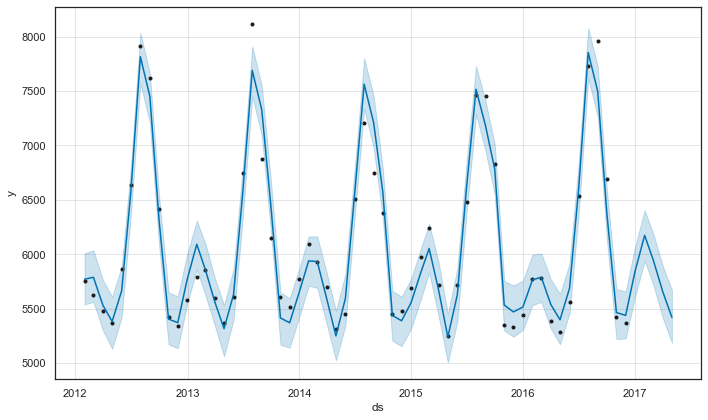

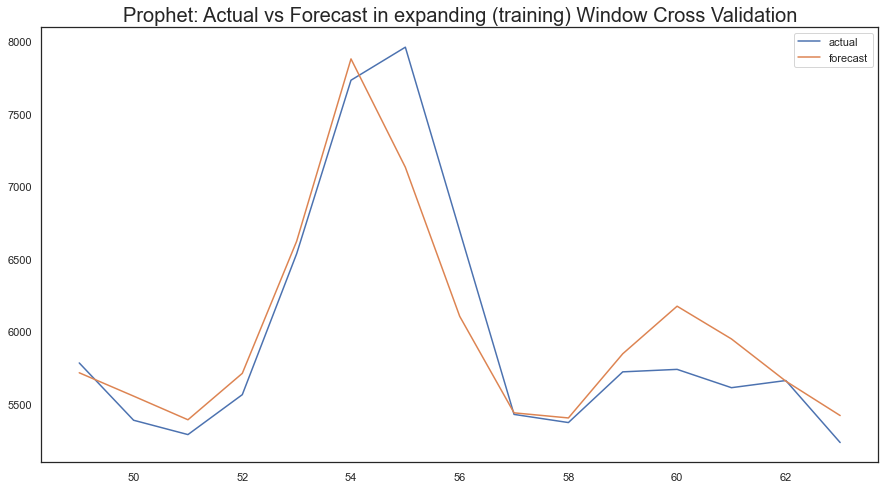

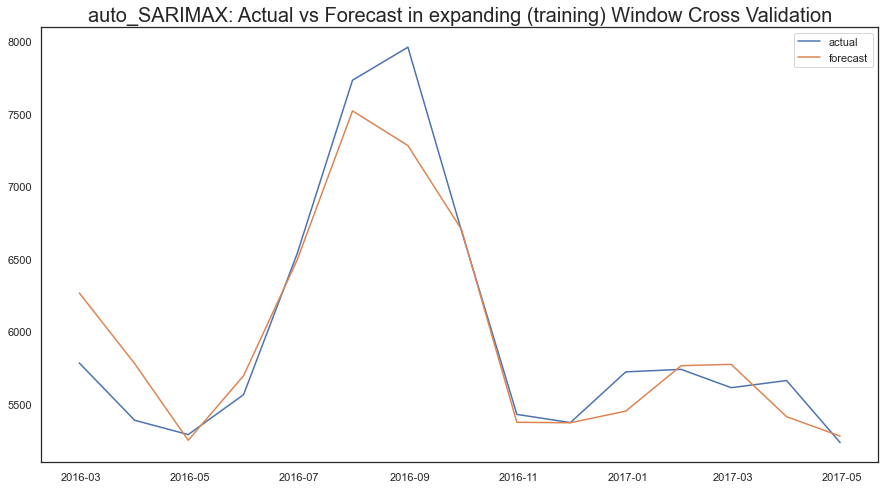

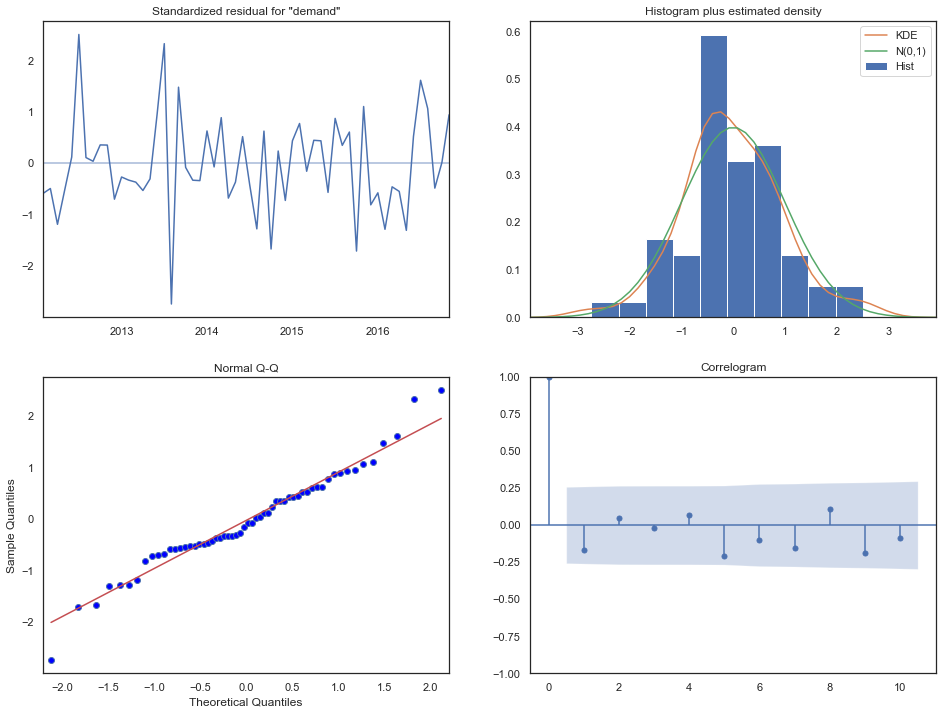

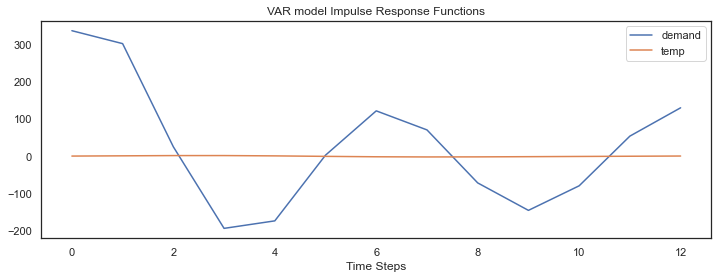

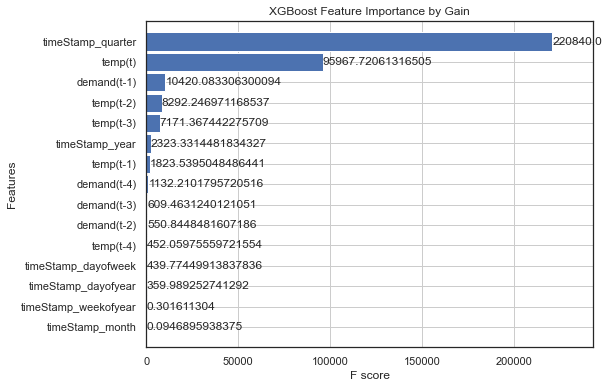

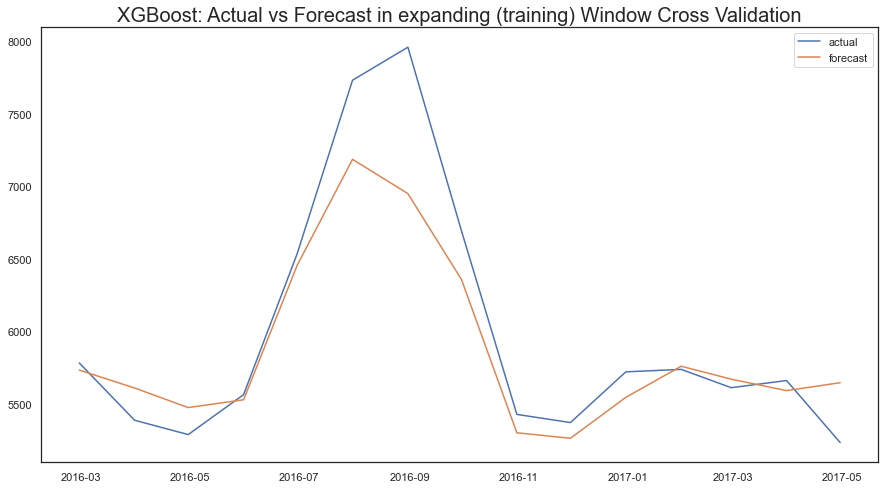

In [21]:
model.fit(traindata=train[['timeStamp','demand','temp']] , ts_column='timeStamp' , target='demand' , cv=3)

In [22]:
model.get_leaderboard()

,name,rmse
1,auto_SARIMAX,261.599367
0,Prophet,281.641704
3,ML,294.022616
2,VAR,486.032685


In [23]:
model.get_cv_scores()

,Model,CV Scores
0,Prophet,119.767661
1,Prophet,459.465887
2,Prophet,265.691565
3,auto_SARIMAX,285.121687
4,auto_SARIMAX,318.701385
5,auto_SARIMAX,180.975028
6,VAR,598.384664
7,VAR,636.342800
8,VAR,223.370592
9,ML,137.255427


In [32]:
## getting all model list and then extracting the VAR models forecast values
result_dict = model.get_ml_dict()
result_dict['VAR']['forecast']

[array([6201.04202962, 6235.84219444, 5940.17616836, 5720.93396774,
        5868.03691989]),
 array([7110.82068506, 6862.22701794, 6168.07329314, 5681.26434115,
        5678.45323158]),
 array([5753.77692562, 5987.60406307, 5813.80885627, 5532.62975319,
        5592.27901262])]

In [33]:
future_pred = model.predict(testdata=test[['timeStamp','demand','temp']],model='auto_SARIMAX')
future_pred

demand,yhat,mean_se,mean_ci_lower,mean_ci_upper
2017-05-31,5401.685173,177.702508,5053.394656,5749.975689
2017-06-30,6537.216408,177.702508,6188.925892,6885.506925
2017-07-31,7557.072973,177.702508,7208.782457,7905.363490
2017-08-31,7542.791078,177.702508,7194.500562,7891.081595


In [40]:
future_pred = model.predict(testdata=test[['timeStamp','demand','temp']],model='Prophet')
future_pred.iloc[:,:4]

Building Forecast dataframe. Forecast Period = 4


,ds,trend,yhat_lower,yhat_upper
0,2017-05-31,5994.634286,5411.546543,5878.472610
1,2017-06-30,5995.018434,6337.231275,6813.664969
2,2017-07-31,5995.415387,7468.868209,7936.167774
3,2017-08-31,5995.812340,7102.781293,7579.703450


In [34]:
test.head()

,timeStamp,demand,precip,temp
64,2017-05-31,5421.773060,0.004031,61.115457
65,2017-06-30,6597.990346,0.003008,71.962625
66,2017-07-31,7306.861511,0.002272,76.380363
67,2017-08-31,6711.707542,0.008961,73.730258
